<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/Example_1_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example_1_18
Solución de un sistema masa–resorte–amortiguador forzad ousando RK1 a RK4 con dos pasos de tiempo dis tintos


Esta función utiliza los métodos RK1 a RK4 con dos Diferentes pasos temporales, cada uno para resolver y representar la respuesta de un sistema de masa de resorte amortiguado de un solo grado de libertad hasta una función de forzamiento sinusoidal, representada por x" + 2*z*wn*x' + wn^2*x 1/4 (Fo/m)*sin(w*t).
La integración numérica la realiza el externo función 'rk1_4', que utiliza la subfunción 'rates' en este caso, para calcular las derivadas. Esta función también representa la solución exacta para comparar.
x - desplazamiento (m)
' - abreviatura de d/dt
t - tiempo (s)
WN - frecuencia circular natural (radianes/s)
z - factor de amortiguamiento
WD - Frecuencia Natural Amortiguada
Fo - amplitud de la función de forzamiento sinusoidal (N)
m - masa (kg)
W - frecuencia de forzamiento (radianes/s)
T0 - Primera Vez (S)
Tf - última vez (s)
h - paso de tiempo uniforme (s)
TSPAN - un vector fila que contiene T0 y TF
x0 - valor de x en t0 (m) x_dot0 - valor de dx/dt en t0 (m/s) f0 - vector columna que contiene x0 y x_dot0 rk - 1/4 1 para RK1; 1/4 2 para RK2; 1/4 3 para RK3; 1/4 para RK4
t - tiempos de solución para la solución exacta t1, ..., t4 - tiempos de solución para RK1,...,RK4 para los más pequeños
t11,...,t41 - tiempos de solución para RK1,...,RK4 para H más grande
f1, ..., f4 - vectores de solución para RK1,...,RK4 para h más pequeño
f11,...,f41 - vectores de solución para RK1,...,RK4 para h más grande
Se requieren funciones M del usuario: rk1_4 Subfunciones de usuario requeridas:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Función RK1–RK4 (equivalente a rk1_4.m)
def rk1_4(rates, tspan, f0, h, rk):
    t0, tf = tspan
    t = np.arange(t0, tf + h, h)

    f = np.zeros((len(t), len(f0)))
    f[0, :] = f0

    for i in range(len(t) - 1):
        ti = t[i]
        fi = f[i, :]

        if rk == 1:      # Euler
            k1 = rates(ti, fi)
            f[i+1] = fi + h * k1

        elif rk == 2:    # RK2
            k1 = rates(ti, fi)
            k2 = rates(ti + h/2, fi + h/2 * k1)
            f[i+1] = fi + h * k2

        elif rk == 3:    # RK3
            k1 = rates(ti, fi)
            k2 = rates(ti + h/2, fi + h/2 * k1)
            k3 = rates(ti + h, fi - h * k1 + 2*h * k2)
            f[i+1] = fi + h/6 * (k1 + 4*k2 + k3)

        elif rk == 4:    # RK4
            k1 = rates(ti, fi)
            k2 = rates(ti + h/2, fi + h/2 * k1)
            k3 = rates(ti + h/2, fi + h/2 * k2)
            k4 = rates(ti + h, fi + h * k3)
            f[i+1] = fi + h/6 * (k1 + 2*k2 + 2*k3 + k4)

    return t, f


In [5]:
# Parámetros del sistema
m = 1
z = 0.03
wn = 1
Fo = 1
w = 0.4 * wn

x0 = 0
x_dot0 = 0
f0 = np.array([x0, x_dot0])

t0 = 0
tf = 110
tspan = (t0, tf)


In [6]:
# Función de derivadas (rates)
def rates(t, f):
    x, Dx = f
    D2x = (Fo/m) * np.sin(w*t) - 2*z*wn*Dx - wn**2 * x
    return np.array([Dx, D2x])


In [7]:
# Integración numérica (RK1 → RK4)
t1,  f1  = rk1_4(rates, tspan, f0, 0.01, 1)
t11, f11 = rk1_4(rates, tspan, f0, 0.1,  1)

t2,  f2  = rk1_4(rates, tspan, f0, 0.1,  2)
t21, f21 = rk1_4(rates, tspan, f0, 0.5,  2)

t3,  f3  = rk1_4(rates, tspan, f0, 0.5,  3)
t31, f31 = rk1_4(rates, tspan, f0, 1.0,  3)

t4,  f4  = rk1_4(rates, tspan, f0, 1.0,  4)
t41, f41 = rk1_4(rates, tspan, f0, 2.0,  4)


In [8]:
# Solución exacta
wd = wn * np.sqrt(1 - z**2)

den = (wn**2 - w**2)**2 + (2*w*wn*z)**2

C1 = (wn**2 - w**2)/den * Fo/m
C2 = -2*w*wn*z/den * Fo/m

A = (x0*wn/wd + x_dot0/wd +
     (w**2 + (2*z**2 - 1)*wn**2)/den * w/wd * Fo/m)

B = x0 + 2*w*wn*z/den * Fo/m

t = np.linspace(t0, tf, 5000)

x_exact = ((A*np.sin(wd*t) + B*np.cos(wd*t)) *
           np.exp(-wn*z*t) +
           C1*np.sin(w*t) + C2*np.cos(w*t))


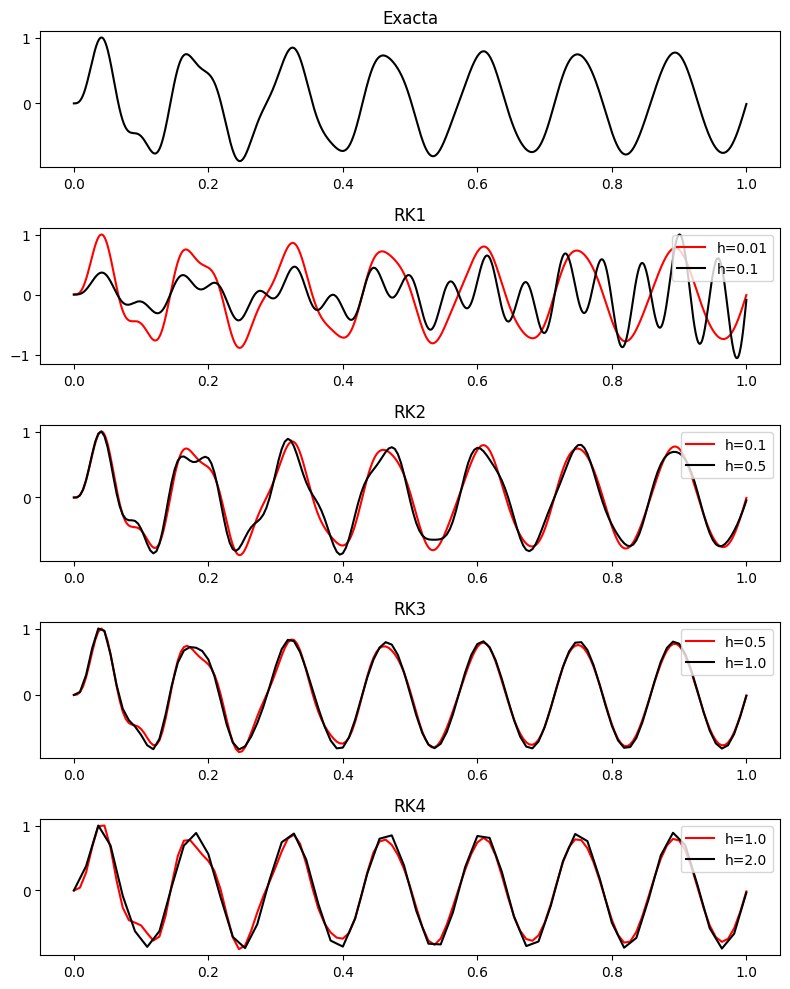

In [9]:
# Gráficas
plt.figure(figsize=(8,10))

plt.subplot(5,1,1)
plt.plot(t/t.max(), x_exact/np.max(x_exact), 'k')
plt.title('Exacta')

plt.subplot(5,1,2)
plt.plot(t1/t1.max(), f1[:,0]/np.max(f1[:,0]), 'r')
plt.plot(t11/t11.max(), f11[:,0]/np.max(f11[:,0]), 'k')
plt.title('RK1')
plt.legend(['h=0.01','h=0.1'])

plt.subplot(5,1,3)
plt.plot(t2/t2.max(), f2[:,0]/np.max(f2[:,0]), 'r')
plt.plot(t21/t21.max(), f21[:,0]/np.max(f21[:,0]), 'k')
plt.title('RK2')
plt.legend(['h=0.1','h=0.5'])

plt.subplot(5,1,4)
plt.plot(t3/t3.max(), f3[:,0]/np.max(f3[:,0]), 'r')
plt.plot(t31/t31.max(), f31[:,0]/np.max(f31[:,0]), 'k')
plt.title('RK3')
plt.legend(['h=0.5','h=1.0'])

plt.subplot(5,1,5)
plt.plot(t4/t4.max(), f4[:,0]/np.max(f4[:,0]), 'r')
plt.plot(t41/t41.max(), f41[:,0]/np.max(f41[:,0]), 'k')
plt.title('RK4')
plt.legend(['h=1.0','h=2.0'])

plt.tight_layout()
plt.show()
